<a href="https://colab.research.google.com/github/Keerthana22-elango/Machine_learning/blob/main/K-means%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

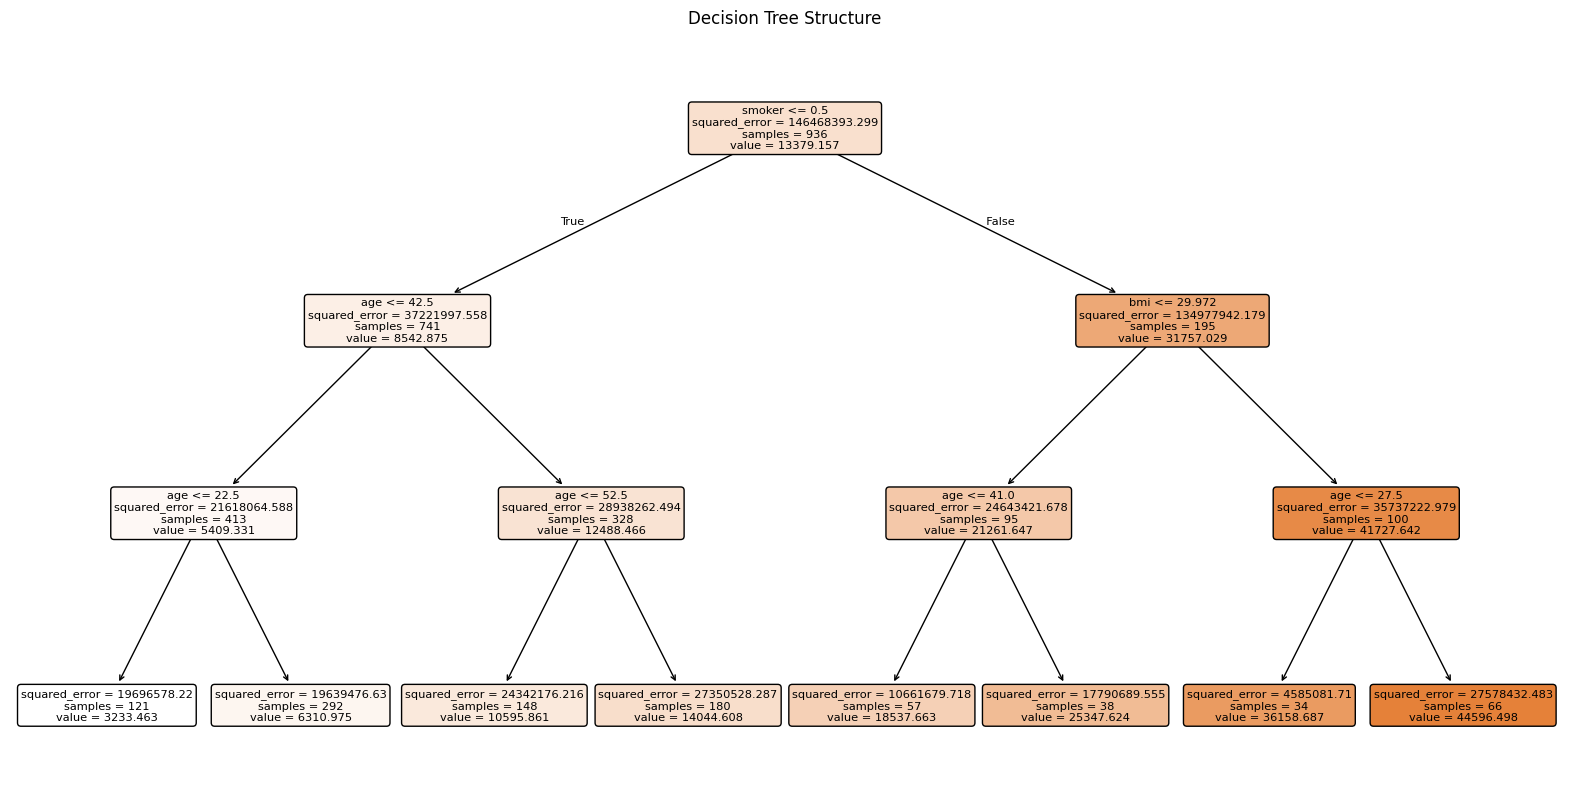

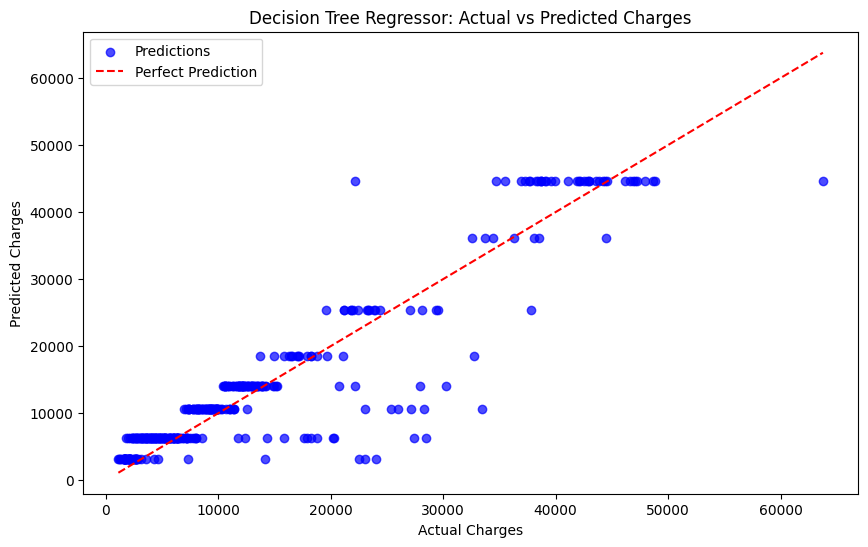

Decision Tree Regressor
Mean Squared Error: 22877590.79048474
R^2 Score: 0.8439713638273123


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    insurance_data[column] = le.fit_transform(insurance_data[column])
    label_encoders[column] = le

# Separate features and target variable for Decision Tree model
X = insurance_data.drop(columns=['charges'])
y = insurance_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
decision_tree_model.fit(X_train, y_train)

# Make predictions and calculate performance metrics for decision tree
y_pred = decision_tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the structure of the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

# Plot Decision Tree predictions vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")  # Line of perfect prediction
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Decision Tree Regressor: Actual vs Predicted Charges")
plt.legend()
plt.show()

# Display results summary
print("Decision Tree Regressor")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


<Figure size 1200x800 with 0 Axes>

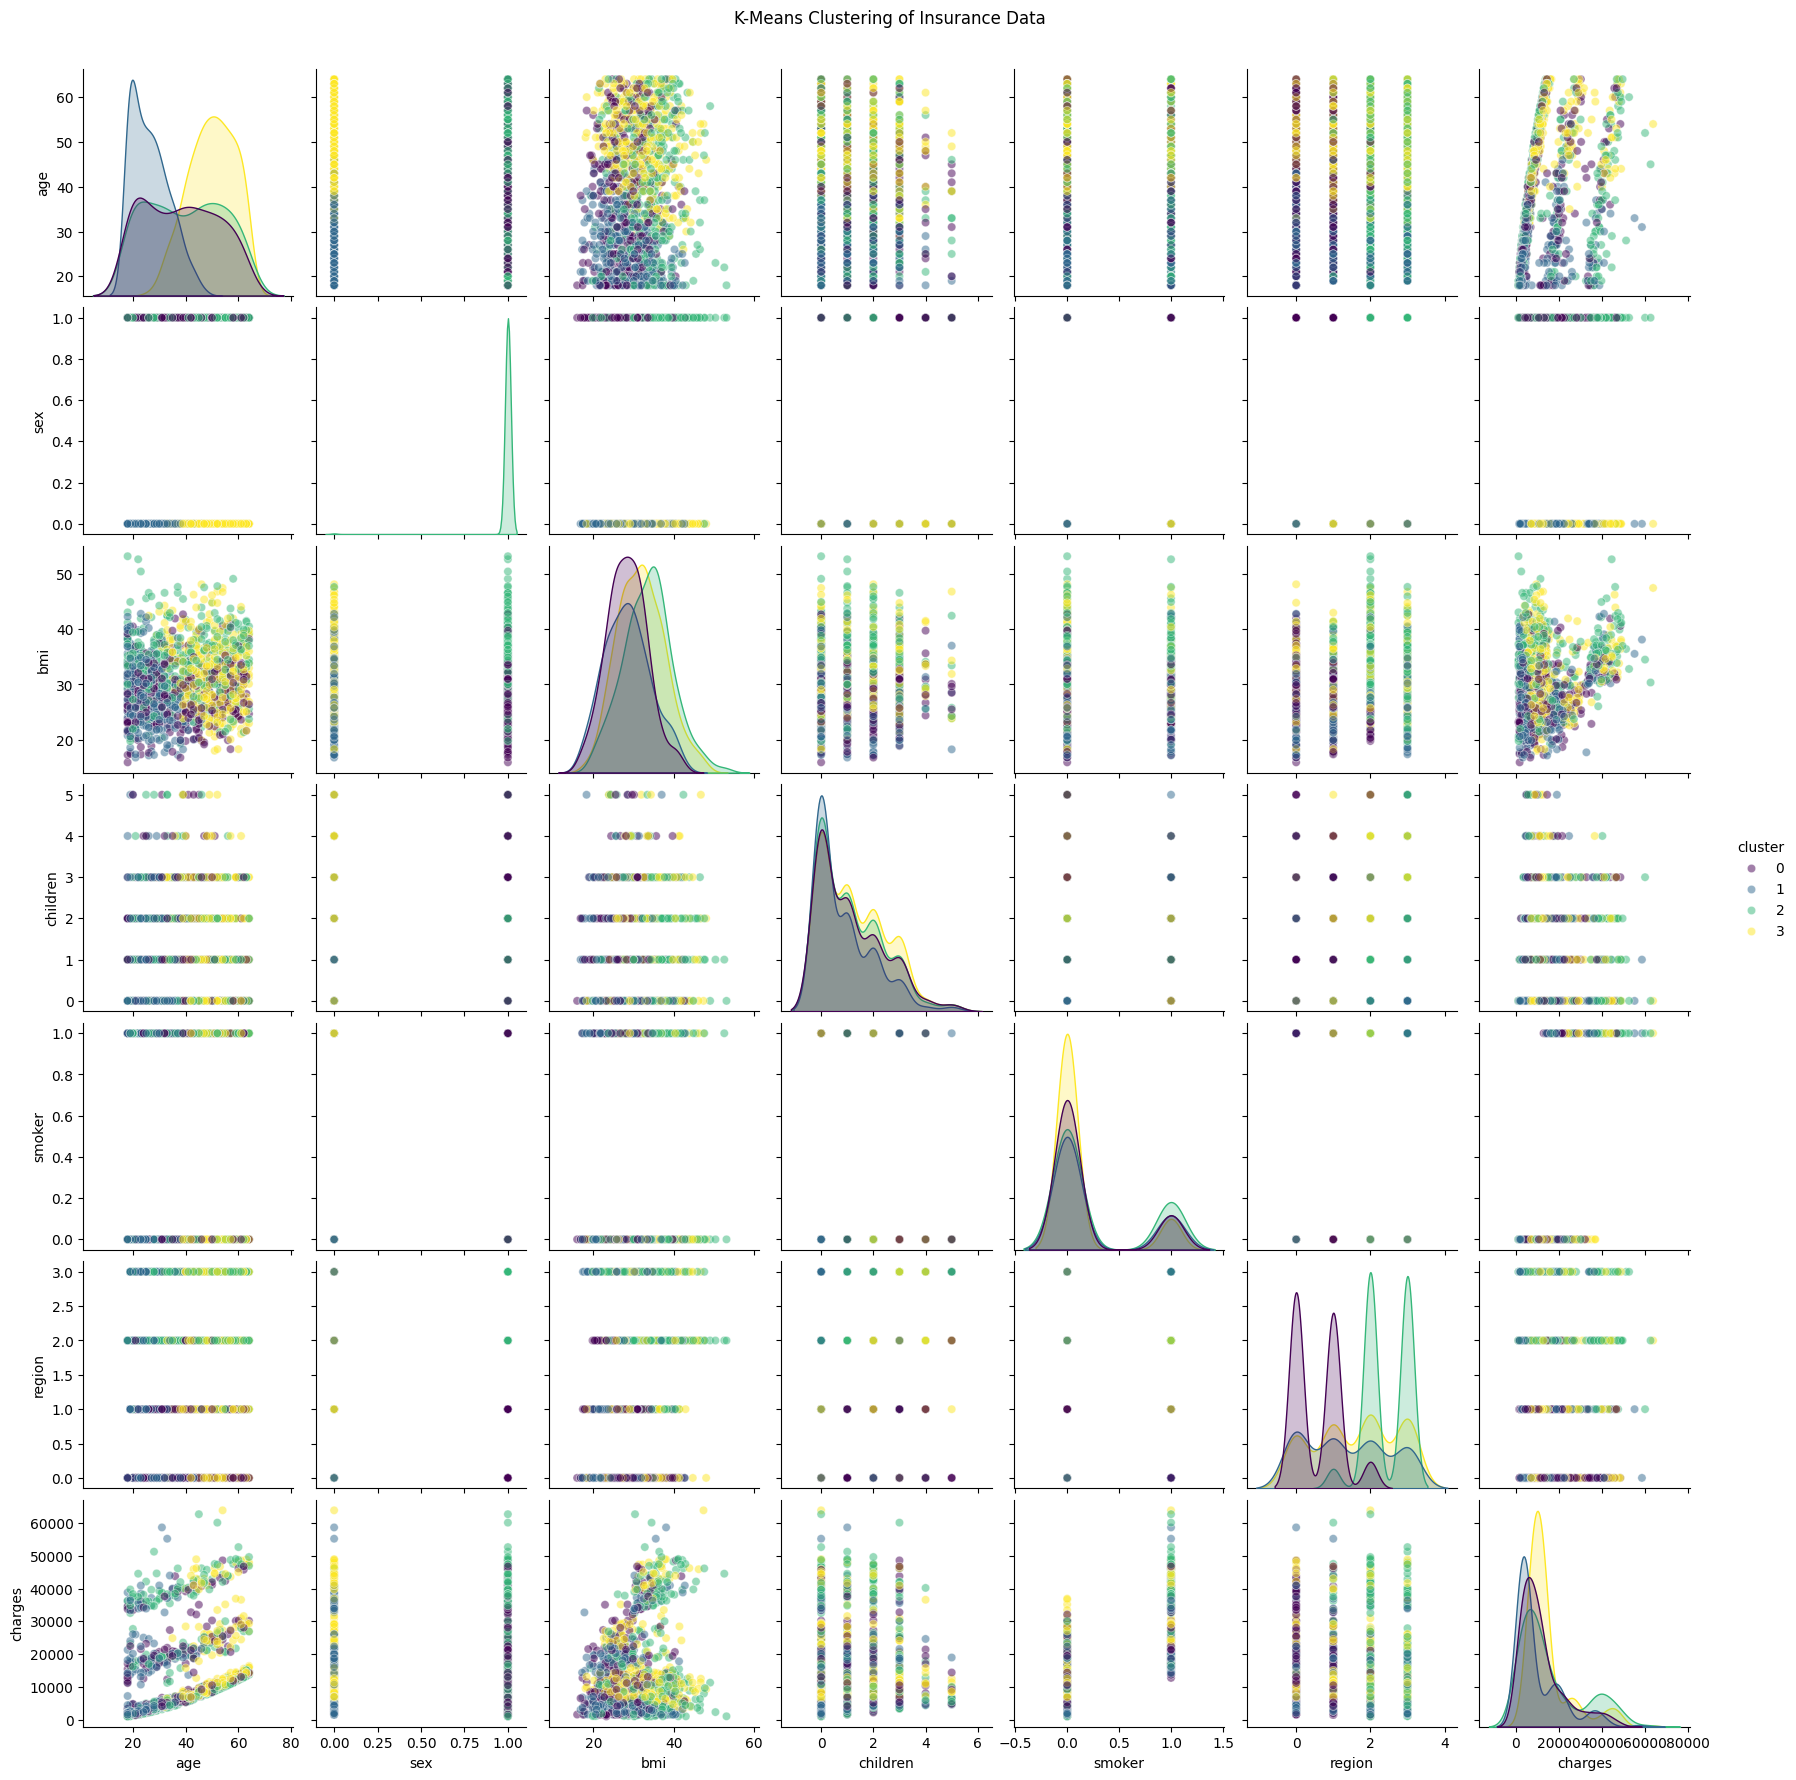


K-Means Clustering Results
Cluster Centers:
 [[-0.0732502   0.98959079 -0.38473107  0.02151637 -0.04329668 -0.85260376]
 [-0.90244676 -1.0105187  -0.35878167 -0.20621802  0.06764742 -0.1300906 ]
 [ 0.02929727  0.98381013  0.46573683  0.01477042  0.19441226  0.82839656]
 [ 0.75686375 -1.0105187   0.19381541  0.13094944 -0.19770688  0.09158472]]
Cluster Counts:
 cluster
3    368
2    346
0    331
1    293
Name: count, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    insurance_data[column] = le.fit_transform(insurance_data[column])
    label_encoders[column] = le

# Standardize features for KMeans clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(insurance_data.drop(columns=['charges']))

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=4, random_state=42)
insurance_data['cluster'] = kmeans_model.fit_predict(X_scaled)

# Plot the clusters using a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(insurance_data, hue='cluster', palette="viridis", diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("K-Means Clustering of Insurance Data", y=1.02)
plt.show()

# Display results summary
print("\nK-Means Clustering Results")
print("Cluster Centers:\n", kmeans_model.cluster_centers_)
print("Cluster Counts:\n", insurance_data['cluster'].value_counts())
